# Exemple Clustering avec KMeans

## Premier exemple : avec des données "dummies"
On va générer aléatoirement des données pour mieux comprendre le fonctionnement de l'algo. 

In [1]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


On va créer un dataset de 150 points organisés en 4 blocs de points plus ou moins proches. Le paramètre *cluster_std* va nous permettre d'indiquer l'écart-type entre les points autour de chaque centre.  

In [2]:

x,y = make_blobs(n_samples=150, centers=4, n_features=2, 
                 cluster_std=[1, 1.5, 2, 2.3], random_state=42)

print (x[:10], y[:10])


[[-2.54502366 10.57892978]
 [-3.34841515  8.70507375]
 [-8.19204646  5.89131402]
 [ 7.46915769  2.2350364 ]
 [-5.84955666 -5.85253769]
 [-5.6282925  -8.59442471]
 [-3.18611962  9.62596242]
 [-2.97867201  9.55684617]
 [-7.82349092 -4.7022084 ]
 [-8.57321463 -9.90980404]] [0 0 3 1 2 2 0 0 2 2]


In [3]:
df_blobs = pnd.DataFrame ({'x1' : x[:,0] ,
                           'x2' : x[:,1],
                           'y' : y })

df_blobs.sample(25)

,x1,x2,y
11,-9.419235,4.453622,3
4,-5.849557,-5.852538,2
116,-6.163051,7.347059,3
50,4.125807,0.769754,1
92,-3.417222,7.601982,0
91,5.084059,2.364753,1
132,7.438541,2.683919,1
22,-7.326553,-5.452109,2
52,3.046423,2.683558,1
49,-11.599009,6.554170,3


<AxesSubplot:xlabel='[x1]', ylabel='[x2]'>

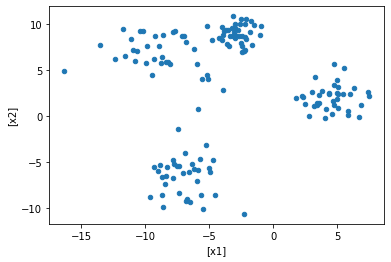

In [4]:
%matplotlib inline 
df_blobs.plot(kind='scatter', x=['x1'], y=['x2'])

In [5]:
df_blobs.describe()

,x1,x2,y
count,150.000000,150.000000,150.000000
mean,-3.350031,2.936343,1.486667
std,5.400412,6.158363,1.121700
min,-16.293243,-10.614640,0.000000
25%,-7.635184,-0.099084,0.250000
50%,-3.919804,4.166135,1.000000
75%,1.088795,8.435589,2.000000
max,7.469158,10.866564,3.000000


on ne garde que les colonnes x1 et x2 (nos features). 

In [6]:
X = df_blobs.drop(columns=['y'])
X.sample(15)

,x1,x2
45,3.586799,1.481676
59,-3.987720,8.294442
116,-6.163051,7.347059
72,5.029703,3.145904
64,-6.164052,-5.758541
6,-3.186120,9.625962
94,-2.250310,-10.614640
79,-1.043549,8.788510
89,3.427138,1.220534
121,-10.193867,9.277608


Dans le clustering, on n'a plus de séparation entre les phases de *fit* et de *predict*, et plus besoin d'un *target* (Y). On peut faire donc juste :

- ***km.fit(X)***
ou 
- ***km.fit_predict(X)***

Ce dernier va nous répondre avec les labels (c.a.d. le cluster auquel chaque point a été affecté). Cette même information est disponible dans l'attribut **km.labels_**.   

In [7]:
from sklearn.cluster import KMeans

km = KMeans(init='k-means++', n_clusters=3)

labels = km.fit_predict(X)

# on voit que les labels retournés par fit_predict et ceux gardés par le modèle sont les mêmes
print(labels)
print(km.labels_)

[0 0 0 2 1 1 0 0 1 1 0 0 2 0 1 2 0 2 2 2 0 0 1 0 1 0 0 0 0 2 2 0 1 0 2 2 1
 0 1 0 2 0 0 0 1 2 0 1 0 0 2 2 2 0 0 0 2 1 0 0 0 0 0 1 1 2 1 1 2 2 0 0 2 0
 0 2 2 1 2 0 0 0 0 1 2 0 2 1 0 2 0 2 0 0 1 2 0 0 0 2 1 1 0 0 1 0 0 2 2 0 1
 2 2 0 0 2 0 1 0 0 0 0 2 0 0 1 0 1 2 0 0 0 2 1 0 1 1 1 2 0 0 0 1 1 0 0 1 0
 0 1]
[0 0 0 2 1 1 0 0 1 1 0 0 2 0 1 2 0 2 2 2 0 0 1 0 1 0 0 0 0 2 2 0 1 0 2 2 1
 0 1 0 2 0 0 0 1 2 0 1 0 0 2 2 2 0 0 0 2 1 0 0 0 0 0 1 1 2 1 1 2 2 0 0 2 0
 0 2 2 1 2 0 0 0 0 1 2 0 2 1 0 2 0 2 0 0 1 2 0 0 0 2 1 1 0 0 1 0 0 2 2 0 1
 2 2 0 0 2 0 1 0 0 0 0 2 0 0 1 0 1 2 0 0 0 2 1 0 1 1 1 2 0 0 0 1 1 0 0 1 0
 0 1]


On va essayer maintenant de visualiser nos clusters. On va utiliser la valeur des labels en tant que couleur pour bien visualiser chaque cluster (chaque point sera coloré avec une couleur dans l'échelle 'viridis' suivant la valeur de son label). 

<AxesSubplot:xlabel='[x1]', ylabel='[x2]'>

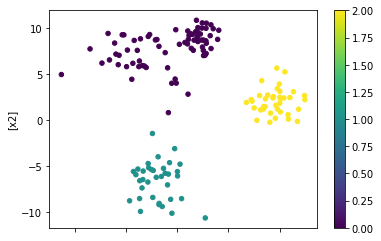

In [8]:
df_blobs.plot(kind='scatter', x=['x1'], y=['x2'], c=labels, colormap='viridis')


On peut varier le nombre de clusters utilisés (et au passage, utiliser la méthode **fit** pour créer notre modèle et l'attribut **labels_** pour récupérer les clusters). 

On va essayer d'afficher tout ça dans un graphique, dans lequel on "plotte" également les centroids de chaque cluster (grâce à l'attribut **cluster_centers_**).  

4  clusters - inertie : 830.5117150373685
5  clusters - inertie : 670.0591203353596
6  clusters - inertie : 561.8903831543001


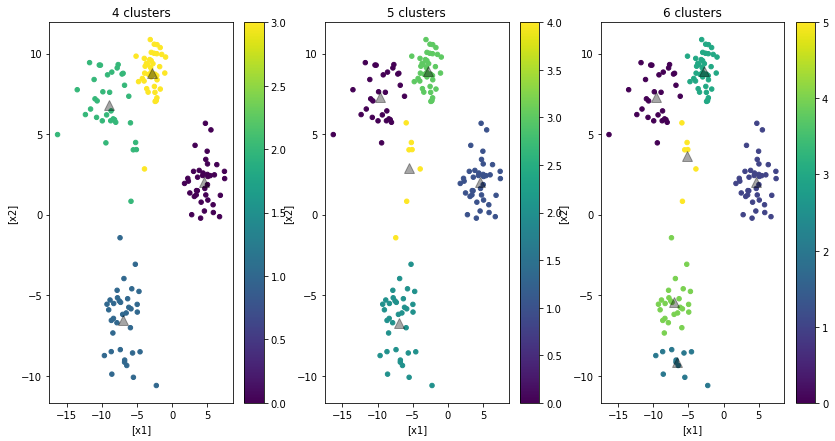

In [9]:
n_clusters = [4,5,6]

# création des "espaces" pour les graphiques
fig, axs = plt.subplots(1,len(n_clusters), figsize=(14,7) )

# pour chaque valeur dans n_clusters, on va créer un nouveau modèle
# avec le nombre de cluster indiqué dans n_clusters et on affiche les clusters
for i in range(len(n_clusters)) :
   n_c = n_clusters[i]
   km = KMeans(init='k-means++', n_clusters=n_c)
   km.fit(X)
   
   df_blobs.plot(kind='scatter', x=['x1'], y=['x2'], c=km.labels_, colormap='viridis',
                 title=f'{n_c} clusters',
                 ax=axs[i])
   
   axs[i].plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1],'k^', ms=10, alpha=0.35)
   
   print(n_c, ' clusters - inertie :',km.inertia_) 

Les centroids de départ contribuent pour beaucoup sur la qualité des clusters créer. On peut les choisir de manière aléatoire (paramètre **init='random'**) mais également les indiquer manuellement (paramètre **init=liste_points**, où *liste_points* est une liste contenant *k* points). 

L'attribut **n_init** indique le nombre de fois l'algorithme sera executé avec différents centroids de départ. Par défault, n_init = 10, ce qui permet d'indentifier des centroids de départ plus intéressant (notamment si on utilise **init='random'**). 

Avec *n_init=1*, on prend le premier centroid trouvé, ce qui va accentuer la caractère randomique (et potentiellement offrir des résultats moins bons). Bref, ici, on utilise *n_init=1* juste pour illustrer, dans la pratique, on utilisera une valeur plus importante, voir la valeur par défault. 

On va essayer ces deux méthodes. ***Il ne faut pas oublier d'exécuter plusieurs fois le bloc avec random*** pour voir différents résultats possibles et leur variations.    

4  clusters - inertie : 835.7813573928802
5  clusters - inertie : 681.4415674174629
6  clusters - inertie : 561.9087161200024


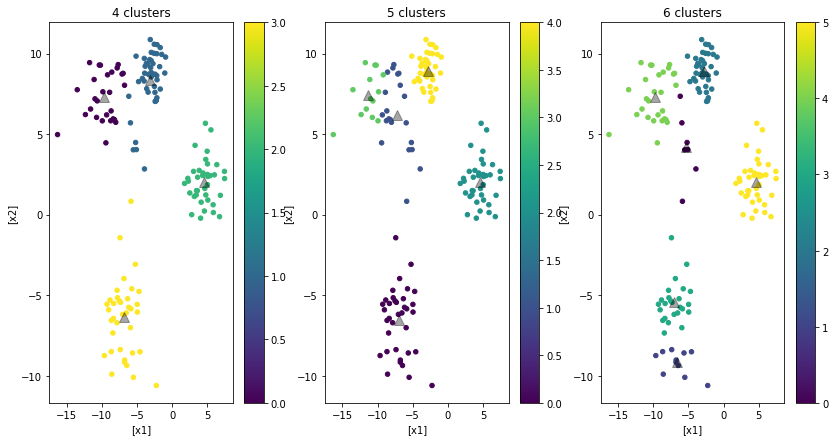

In [10]:
n_clusters = [4,5,6]

# création des "espaces" pour les graphiques
fig, axs = plt.subplots(1,len(n_clusters), figsize=(14,7) )

# pour chaque valeur dans n_clusters, on va créer un nouveau modèle
# avec le nombre de cluster indiqué dans n_clusters et on affiche les clusters
for i in range(len(n_clusters)) :
   n_c = n_clusters[i]
   km = KMeans(init='random', n_clusters=n_c, n_init=1)
   km.fit(X)
   
   df_blobs.plot(kind='scatter', x=['x1'], y=['x2'], c=km.labels_, colormap='viridis',
                 title=f'{n_c} clusters',
                 ax=axs[i])
   
   axs[i].plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1],'k^', ms=10, alpha=0.35)
   
   print(n_c, ' clusters - inertie :',km.inertia_) 
    

Maintenant avec les centroids pré-définis. 
On fait deux essaies avec des centroids plus ou moins intelligents. 

4 clusters - inertie : 1564.5892039160647


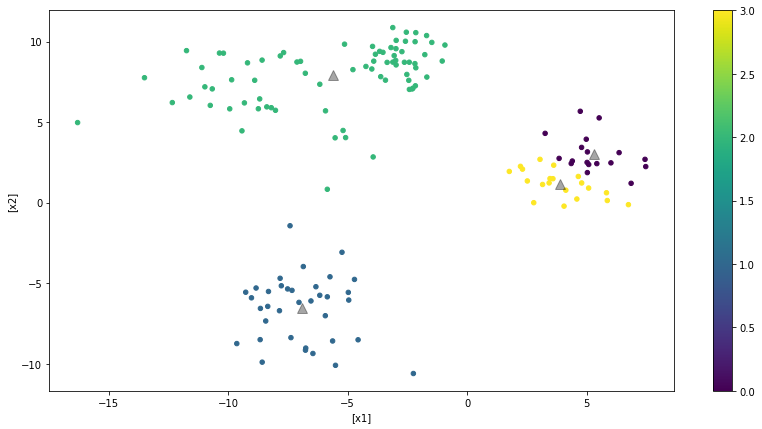

In [11]:
centroids = np.array([[X['x1'].max(), X['x2'].max()],
                      [X['x1'].min(), X['x2'].min()],
                      [X['x1'].mean(), X['x2'].mean()],
                      [0,0]])

km = KMeans(init=centroids, n_clusters=4, n_init=1)
km.fit(X)

fig, ax = plt.subplots(1,1, figsize=(14,7) )
df_blobs.plot(kind='scatter', x=['x1'], y=['x2'], c=km.labels_, colormap='viridis', ax=ax)
ax.plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1],'k^', ms=10, alpha=0.35)

print('4 clusters - inertie :',km.inertia_)

4 clusters - inertie : 835.7813573928802


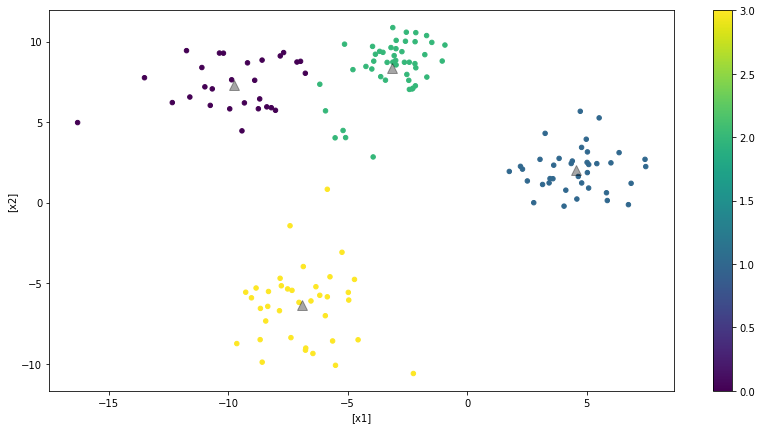

In [12]:
centroids = np.array([[-15, 10],
                      [5, 8],
                      [-10, 10],
                      [5,-5]])

km = KMeans(init=centroids, n_clusters=4, n_init=1)
km.fit(X)

fig, ax = plt.subplots(1,1, figsize=(14,7) )
df_blobs.plot(kind='scatter', x=['x1'], y=['x2'], c=km.labels_, colormap='viridis', ax=ax)
ax.plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1],'k^', ms=10, alpha=0.35)

print('4 clusters - inertie :',km.inertia_)

### A observer
On observe que les différents paramètres, et notamment les centroids de départ, vont nous offrir des clusters différents. 

Un premier indicateur d'évaluation pour les clusters proposé est **l'inertie**, laquelle se base les distances intra-cluster entre chaque point et son centroid. 

## Comment trouver le bon K ? 

Une question recurrente avec l'usage de *KMeans* est *comment trouver la valeur de K optimale?*. La meilleure manière est d'en tester plusieurs et de les comparer. C'est ce qu'on fera dans l'exemple qui suit. 

Pour commencer, on va générer un nouveau dataset avec plus de données cette fois-ci et on va exécuter KMeans avec un nombre variable de K de 3 à 9 clusters. On va ensuite comparer les résultats en utilisant deux indicateurs : l'inertie et le **Silhouette score**.

In [13]:
# création des données
x,y = make_blobs(n_samples=1000, centers=6, n_features=2, 
                 cluster_std=[3.5, 4.5, 3.0, 2.5, 1.5, 2.0], random_state=7)

# création du DataFrame avec les features 

X = pnd.DataFrame ({'x1' : x[:,0] ,
                    'x2' : x[:,1] })

X.describe()

,x1,x2
count,1000.000000,1000.000000
mean,-0.160541,1.148996
std,6.515354,5.811310
min,-16.541976,-16.697765
25%,-4.976422,-1.626472
50%,-0.335115,1.619948
75%,3.904897,5.617695
max,15.930211,13.464959


On affiche le dataset généré pour avoir une petite idée. 

<AxesSubplot:xlabel='[x1]', ylabel='[x2]'>

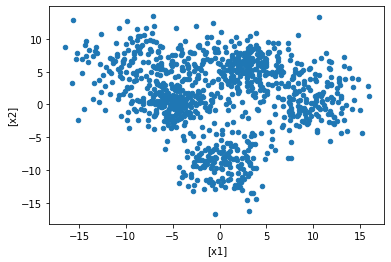

In [14]:
X.plot(kind='scatter', x=['x1'], y=['x2'])

On va définir le nombre de k à tester et 
deux listes (tableaux) qui vont contenir les valeurs d'inertie et de silhouette
afin de pouvoir les comparer après.

Puis, on va exécuter notre kmeans plusieurs fois, une avec chaque valeur de k possible.  

inertie = 24646.67444781667 silhouette score= 0.47880922394354547
inertie = 17545.428144265745 silhouette score= 0.4677984928400866
inertie = 12342.863716219787 silhouette score= 0.47940480825625975
inertie = 10743.187102736889 silhouette score= 0.4627057286150732
inertie = 9755.974738995063 silhouette score= 0.4311619188199141
inertie = 8725.4129677717 silhouette score= 0.419270098406779
inertie = 7939.8104556778135 silhouette score= 0.3819750273587524


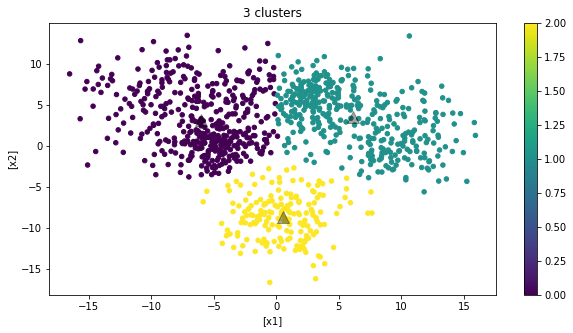

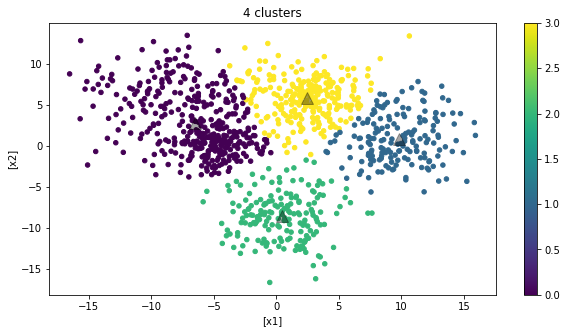

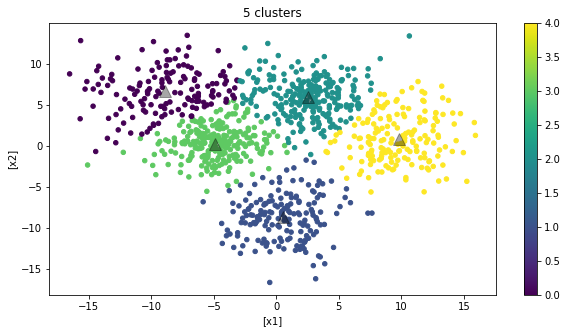

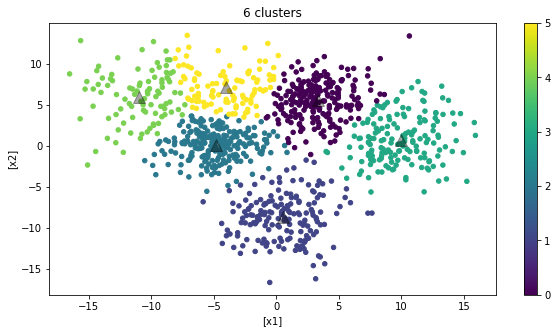

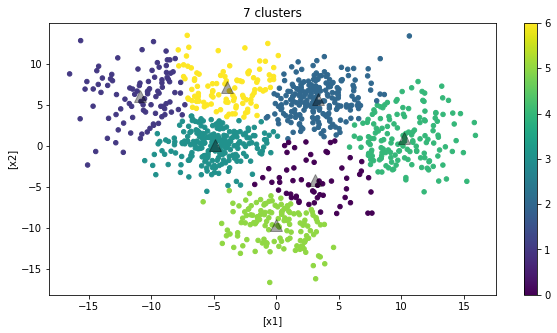

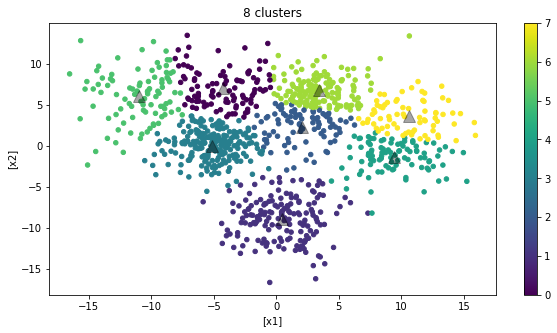

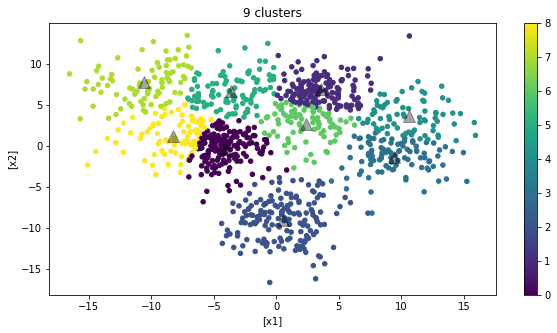

In [15]:
from sklearn.metrics import silhouette_score

n_clusters = [3, 4, 5, 6, 7, 8, 9]
inerties = []
silhouettes = []

for k in n_clusters :
    km = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=7)
    km.fit(X)
    
    scoef = silhouette_score(X,km.labels_)
    
    inerties.append(km.inertia_)
    silhouettes.append(scoef)
    
    fig, ax = plt.subplots(1,1, figsize=(10,5) )
    X.plot(kind='scatter', x=['x1'], y=['x2'], c=km.labels_, colormap='viridis', 
           ax=ax, title=f'{k} clusters')
    ax.plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1],'k^', ms=12, alpha=0.35)
    
    print ('inertie =', km.inertia_,'silhouette score=', scoef)


Maintenant, on peut comparer nous deux mesures (inertie et silhouette) pour chaque valeur de k. 

In [16]:
print (len(n_clusters), n_clusters)
print (len(inerties), inerties)
print (len(silhouettes), silhouettes)

7 [3, 4, 5, 6, 7, 8, 9]
7 [24646.67444781667, 17545.428144265745, 12342.863716219787, 10743.187102736889, 9755.974738995063, 8725.4129677717, 7939.8104556778135]
7 [0.47880922394354547, 0.4677984928400866, 0.47940480825625975, 0.4627057286150732, 0.4311619188199141, 0.419270098406779, 0.3819750273587524]


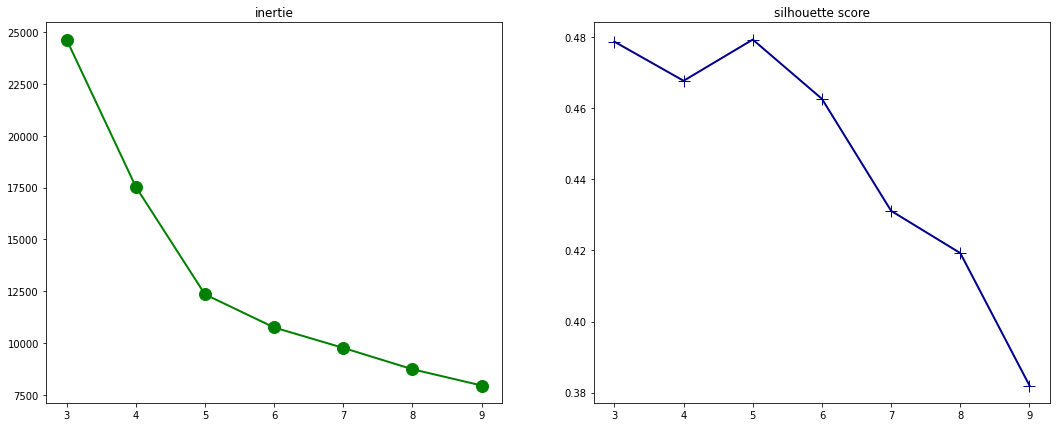

In [17]:
fig, axs = plt.subplots(1,2, figsize=(18,7) )

axs[0].set_title('inertie')
axs[0].plot(n_clusters,inerties, marker='o', 
            color='green', linewidth=2, markersize=12)

axs[1].set_title('silhouette score')
axs[1].plot(n_clusters,silhouettes, marker='+', 
            color='darkblue', linewidth=2, markersize=12)


### A observer

On observe que le meilleur valeur de K pour notre dataset est ***k=5***, puisque celui-ci correspond au score *silhouette* le plus élévé. Ceci est aussi visibile par l'*inertie*, puisque le "gain" sur celle-ci se réduit (la valeur semble se stabiliser ou presque) à partir de la valeur *k=5* (méthode dite "***elbow***").   